In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from tsensor import explain as exp

## Load California Housing Dataset

In [2]:
data_bunch = fetch_california_housing()
print(type(data_bunch))
print(data_bunch)

<class 'sklearn.utils._bunch.Bunch'>
{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DE

In [3]:
for key in data_bunch:
    print(key)

data
target
frame
target_names
feature_names
DESCR


In [4]:
X = data_bunch["data"]
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [5]:
y = data_bunch["target"]
print(type(y))
print(y)

<class 'numpy.ndarray'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
print(X.shape)

(20640, 8)


In [7]:
X[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [8]:
y[0]

np.float64(4.526)

## Transform the dataset

In [ ]:
# We have to separate X into X train and X test for training and validatio purposes
# We take the transpose for X, as we want the features to be the lines to be able to do matrices product
X_test = X[:3000].T
y_test = y[:3000].T 

print(X_test.shape)
print(y_test.shape)

(8, 3000)
(3000,)


In [10]:
X_train = X[3000:].T
y_train = y[3000:].T
n, m = X_train.shape
print(n, m)
print(X_train.shape)
print(y_train.shape)

8 17640
(8, 17640)
(17640,)


For this exercice, we will use a Neural Network with 1 hidden layer, and 6 neurons in this hidden layer. It should look like :
 
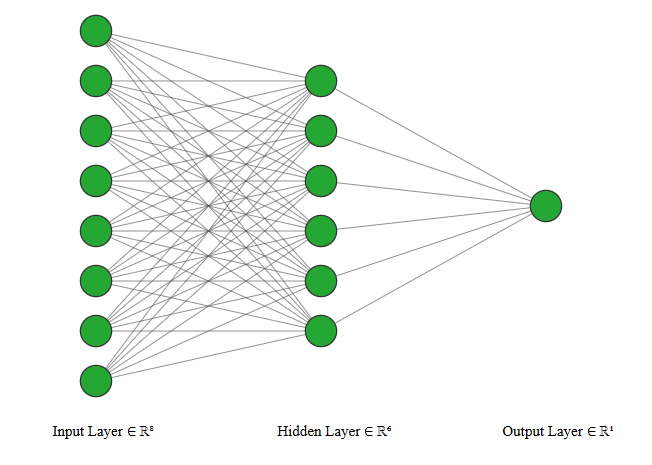

## Definition of the functions we will use

In [11]:
# Definition of activation functions - Rectified Linear Unit
def ReLU(x):
    return np.maximum(0, x)

def ReLU_prime(x):
    return x > 0

In [61]:
def init_weights():
    W1 = np.random.randn(6, 8) # Needs to be of dimension (6 x 8)
    b1 = np.random.randn(6, 1) # Needs to be of dimension (6 x 1)
    W2 = np.random.randn(1, 6) # Needs to be of dimension (1 x 6)
    b2 = np.random.randn(1, 1) # Needs to be of dimension (1 x 1)
    return W1, b1, W2, b2

In [64]:
def gradient_descent(X, y, W1, b1, W2, b2, lr=0.1):
    # Forward pass
    Z1 = W1.dot(X) + b1 # hidden_layer
    #print(f"Shape Z1 : {Z1.shape}") # hidden_layer.shape
    A1 = ReLU(Z1) # hidden_layer_activated
    #print(f"Shape A1 : {A1.shape}") # hidden_layer_activated.shape
    Z2 = W2.dot(A1) + b2 # output_layer
    #print(f"Shape Z2 : {Z2.shape}") # output_layer.shape
    A2 = Z2 # output_layer_activated, no need for an activation function for regression models usually
    #print(f"Shape A2 : {A2.shape}")
    y_hat = A2 # for simplification and display purposes
    
    # Backward propagation
    error = y_hat - y
    #print(error) # It works til here. Now, the hard pass !
    # Reminder here : y_hat = A2 = Z2 = W2.A1 + b2. The goal is to understand how off we are from good predictions, by knowing how bad are W2 and b2.
    # To do this, we calculate dLoss/dW2 = dLoss/dZ2 . dZ2.dW2
    # Reminder : Loss = MSE = 1/m*sum(y_hat - y)**2 
    # No activation function : A2 = Z2, and A2 = y_hat, so Z2 = y_hat
    # So, dLoss/dZ2 = dLoss/dy_hat = (1/m). 2.(y_hat - y)
    dZ2 = 2/m*(y_hat - y)
    #print(f"Shape dZ2 : {dZ2.shape}")
    # We can now calculate dLoss/dW2, that we'll call dW2 : 
    # Remembering that Z2 = W1.A1 + b2,   
    dW2 = dZ2.dot(A1.T) 
    #print(f"Shape dW2 : {dW2.shape}")
    # For b2, it's the same. As Z2 = W2.A1 + b2, dZ2/db2 = 1. So dLoss/db2 = dLoss/dZ2 . dZ2.db2 = (1/m). 2.(y_hat - y) = dZ2
    db2 = np.sum(dZ2, axis=1, keepdims=True) 
    #print(f"Shape db2 : {db2.shape}")
    # So now, we just are going layer through layer, in the opposite direction.
    dA1 = W2.T.dot(dZ2)
    #print(f"Shape dA1 : {dA1.shape}")
    dZ1 = dA1*ReLU_prime(Z1)
    #print(f"Shape dZ1 : {dZ1.shape}")
    dW1 = dZ1.dot(X.T)
    #print(f"Shape dW1 : {dW1.shape}")
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    #print(f"Shape db1 : {db1.shape}")
    
    
    # Update the weights 
    W1 -= dW1*lr
    b1 -= db1*lr
    W2 -= dW2*lr
    b2 -= db2*lr
    
    #loss = np.mean((y_hat - y)**2)
    loss = np.mean(np.abs(y_hat - y))
    return loss

In [18]:
W1, b1, W2, b2 = init_weights()
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(6, 8)
(6, 1)
(1, 6)
(1, 1)


In [ ]:
# Won't work anymore as I am returning things now
gradient_descent(X_train, y_train, W1, b1, W2, b2)


Shape Z1 : (6, 17640)
Shape A1 : (6, 17640)
Shape Z2 : (1, 17640)
Shape A2 : (1, 17640)
[[ 175.16268458 2204.68067665 1303.99409046 ...  485.95338857
   359.28304057  666.84248156]]
Shape dZ2 : (1, 17640)
Shape dW2 : (1, 6)
Shape db2 : (1, 1)
Shape dA1 : (6, 17640)
Shape dZ1 : (6, 17640)
Shape dW1 : (6, 8)
Shape db1 : (6, 1)


In [65]:
def train_mlp(X_train, y_train, X_test, y_test, n_epochs):
    # Initialize the weights
    W1, b1, W2, b2 = init_weights()
    # print(W1.shape)
    # print(b1.shape)
    # print(W2.shape)
    # print(b2.shape)
    
    # To calculate the losses - plot 
    train_history = []
    test_history = []
    
    for epoch in range(n_epochs): 
        loss_train = gradient_descent(X_train, y_train, W1, b1, W2, b2)
        train_history.append(loss_train)
        
        # Make predictions
        Z1_test = W1.dot(X_test) + b1
        A1_test = ReLU(Z1_test)
        Z2_test = W2.dot(A1_test) + b2
        y_hat_test = Z2_test
        #loss_test = np.mean((y_hat_test - y_test)**2)
        loss_test = np.mean(np.abs(y_hat_test - y_test))
        test_history.append(loss_test)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss: {loss_train:.2f}, Test Loss: {loss_test:.2f}")
            
        # Plot histories here, calculate number of epochs !
            
    return W1, b1, W2, b2, train_history, test_history
        

W1, b1, W2, b2, train_history, test_history = train_mlp(X_train, y_train, X_test, y_test, 150)

Epoch 0: Train Loss: 691.48, Test Loss: 72430138792267.39
Epoch 10: Train Loss: 2888819139355.31, Test Loss: 2311055311483.65
Epoch 20: Train Loss: 310184593189.75, Test Loss: 248147674551.20
Epoch 30: Train Loss: 33305817086.83, Test Loss: 26644653668.86
Epoch 40: Train Loss: 3576184878.86, Test Loss: 2860947902.49
Epoch 50: Train Loss: 383989927.48, Test Loss: 307191941.38
Epoch 60: Train Loss: 41230604.51, Test Loss: 32984483.01
Epoch 70: Train Loss: 4427102.45, Test Loss: 3541681.36
Epoch 80: Train Loss: 475356.51, Test Loss: 380284.61
Epoch 90: Train Loss: 51041.02, Test Loss: 40832.21
Epoch 100: Train Loss: 5480.49, Test Loss: 4383.79
Epoch 110: Train Loss: 588.46, Test Loss: 470.17
Epoch 120: Train Loss: 63.19, Test Loss: 49.95
Epoch 130: Train Loss: 6.78, Test Loss: 4.83
Epoch 140: Train Loss: 0.98, Test Loss: 0.76


In [66]:
## I'll try to see if the predictions are actually correct or not tomorrow

Improvements : 
- Standardize the data !!
- Implement L2 regulairization (...)
- Change the architecture of the MLP

Note :  in this present version I'm using the MAE. I just wanted to see the impact of the choice of error on the results. It doesn't make much sense as the loss function is still the MSE. But we can always change it back (if I am not making any mistakes. It's late...)